# Dogbolt ast study

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import json
import os
import numpy as np

## Dependencies and dataset

In [3]:
# Style
sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

LOGS_PATH = './llm_server/logs/llm_metrics_db.csv'
REPORTS_PATH = './dogbolt_bench/outputs/*.json'

In [4]:
def load_metrics(path):
    try:
        df = pd.read_csv(path)     
        df = df.drop(columns=df.columns[:2])
    except Exception as e:
        print(f"Error reading CSV: {e}")
        return pd.DataFrame()

    return df

df_metrics = load_metrics(LOGS_PATH)

print(f"Loaded {len(df_metrics)} hardware metric records.")
df_metrics.head()

Loaded 1378 hardware metric records.


,model_id,operation,duration_sec,peak_vram_gb,system_ram_gb,prompt_tokens,generated_tokens
0,qwen-coder,generate,5.8603,5.4109,2.0528,462,54
1,qwen-coder,generate,5.1144,5.4046,2.0528,431,85
2,qwen-coder,generate,5.2516,5.4050,2.0530,434,95
3,qwen-coder,generate,3.7344,5.4065,2.0530,444,59
4,qwen-coder,generate,4.8716,5.4033,2.0530,422,66


# LLM

## Time LLM study

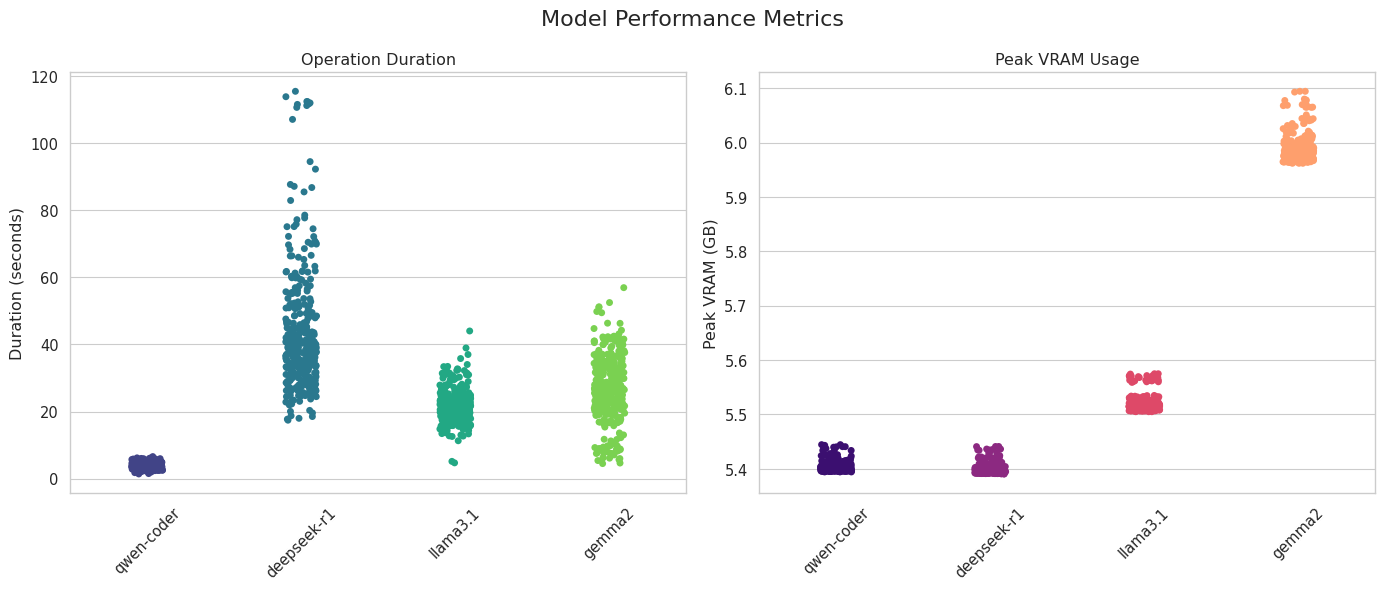

In [13]:
if not df_metrics.empty:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

    sns.stripplot(
        data=df_metrics,
        x='model_id',
        y='duration_sec',
        hue='model_id',
        palette='viridis',
        dodge=False,
        ax=axes[0]
    )
    axes[0].set_title('Operation Duration')
    axes[0].set_ylabel('Duration (seconds)')
    axes[0].set_xlabel('')
    axes[0].tick_params(axis='x', rotation=45)

    sns.stripplot(
        data=df_metrics,
        x='model_id',
        y='peak_vram_gb',
        hue='model_id',
        palette='magma',
        dodge=False,
        ax=axes[1]
    )
    axes[1].set_title('Peak VRAM Usage')
    axes[1].set_ylabel('Peak VRAM (GB)')
    axes[1].set_xlabel('')
    axes[1].tick_params(axis='x', rotation=45)

    fig.suptitle('Model Performance Metrics', fontsize=16)
    fig.tight_layout()
    plt.show()
else:
    print("No metrics data found.")

## Generation study

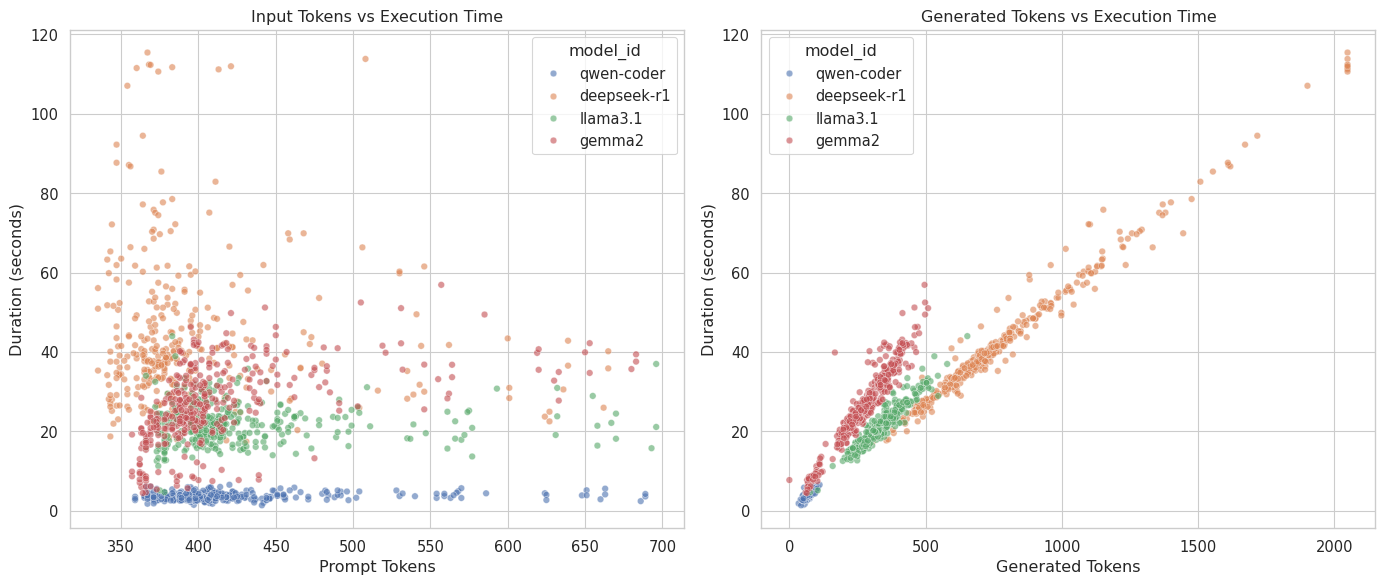

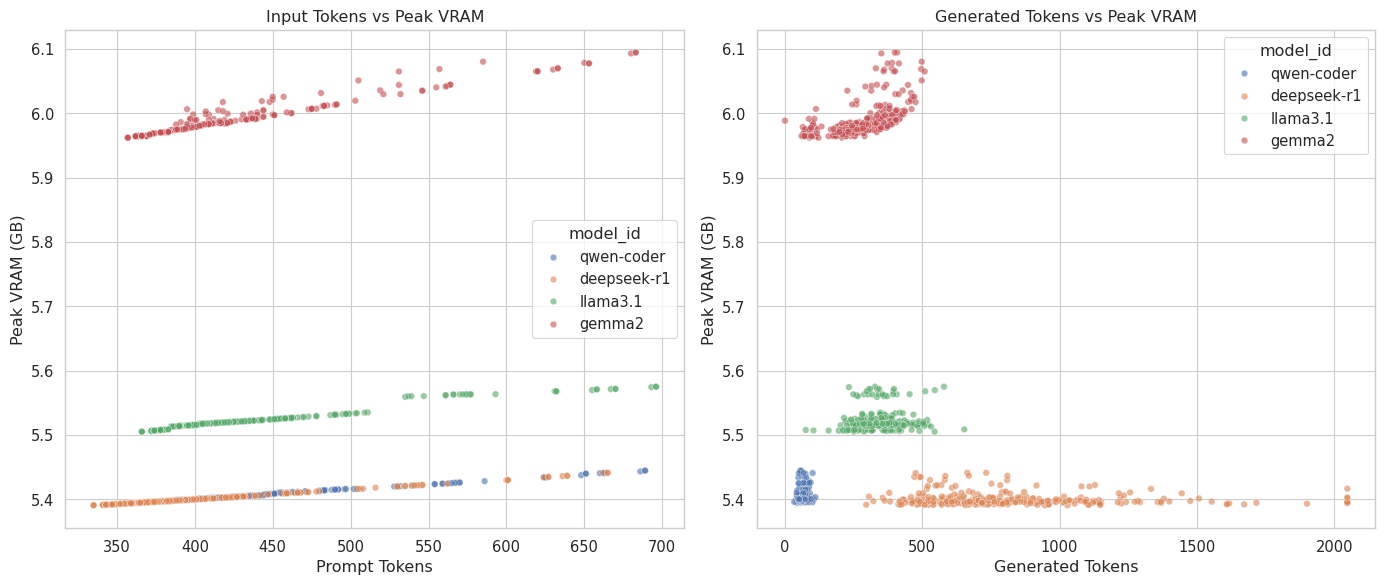

In [8]:
df_gen = df_metrics[df_metrics['operation'] == 'generate'].copy()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_gen, x='prompt_tokens', y='duration_sec', hue='model_id', alpha=0.6)
plt.title('Input Tokens vs Execution Time')
plt.xlabel('Prompt Tokens')
plt.ylabel('Duration (seconds)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_gen, x='generated_tokens', y='duration_sec', hue='model_id', alpha=0.6)
plt.title('Generated Tokens vs Execution Time')
plt.xlabel('Generated Tokens')
plt.ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_gen, x='prompt_tokens', y='peak_vram_gb', hue='model_id', alpha=0.6)
plt.title('Input Tokens vs Peak VRAM')
plt.xlabel('Prompt Tokens')
plt.ylabel('Peak VRAM (GB)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_gen, x='generated_tokens', y='peak_vram_gb', hue='model_id', alpha=0.6)
plt.title('Generated Tokens vs Peak VRAM')
plt.xlabel('Generated Tokens')
plt.ylabel('Peak VRAM (GB)')

plt.tight_layout()
plt.show()



# Reports study